<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristóbal Subiabre
- Nombre de alumno 2: Raimundo Sandoval


### **Link de repositorio de GitHub:** `https://github.com/raisando/Laboratorio-MDS7202-`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
#!pip install --upgrade pandas
#!pip install xlrd
#!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
#!pip install --upgrade plotly
#!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import os

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    #path = '/content/drive/MyDrive/U. Chile/9no Semestre 2023/Laboratorio Programación Cientifica/Lab_6'
    path = '/content/drive/MyDrive/U/Lab_6'
    os.chdir(path)
except: 
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [ ]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> El analisis univariable se enfoca en estudiar el comportamiento y propiedades de cada caracteristica por separado, el multivariable estudia relaciones entre las distintas caracteristicas y por último el de datos faltantes se usa para manejar y tratar de la mejor forma posible los datos NA o erroneos. El principal beneficio es que a partir de estos datos es posible obtener mejores conclusiones y mejor manejo de los datos.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [ ]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [ ]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

**Respuesta:** Con respecto a lo resultados obtenidos en la tabla Price Profile, vemos que el valor minimo es negativo, esto carece de sentido segun la definicion de precio. Esto implica datos poco precisos al reportar el comportamiendo de la variable.
Por otro lado, la presencia de outliers aumenta mucho la skewness de la distribucion, el 75% de los datos es menora 4.21 y el valor maximo es 1269.51.

In [ ]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

**Respuesta:** De igual manera, en esta variable vemos que tambien hay valores negativos, que nuevamente carecen de sentido. De la misma manera los outliers afectan la skewness y kurtosis de la distribucion fuertemente.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [ ]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

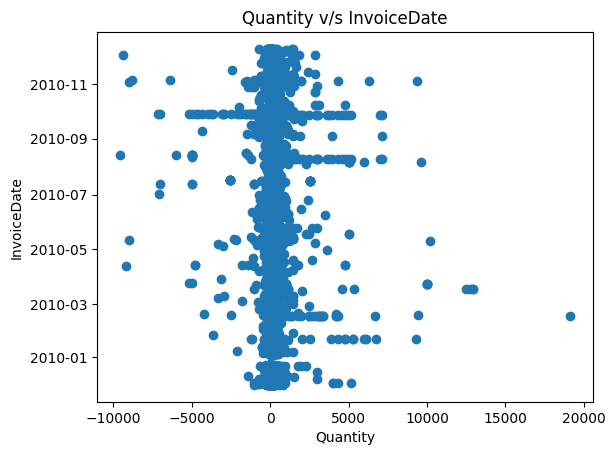

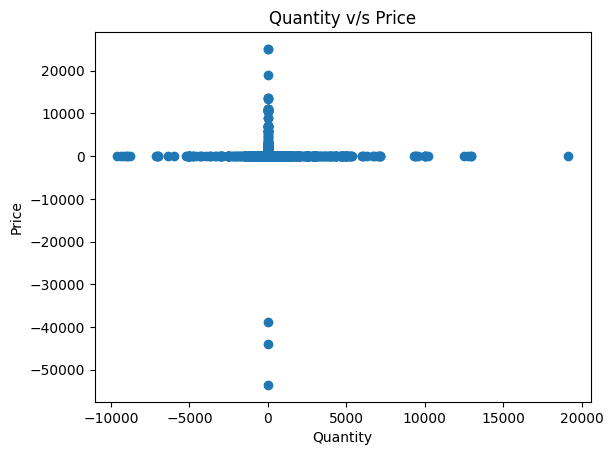

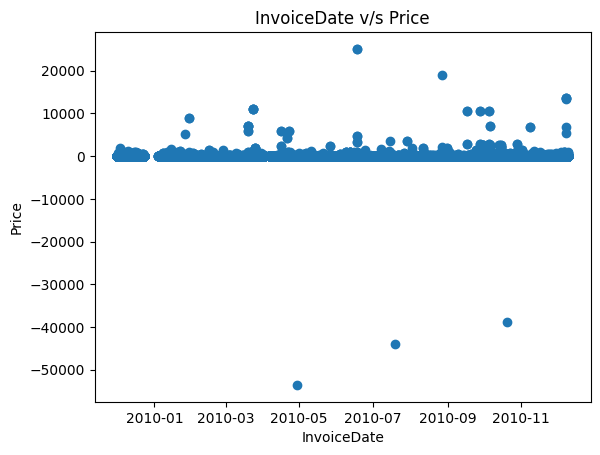

## Correlation:

<ipython-input-7-5c317ab18072>:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

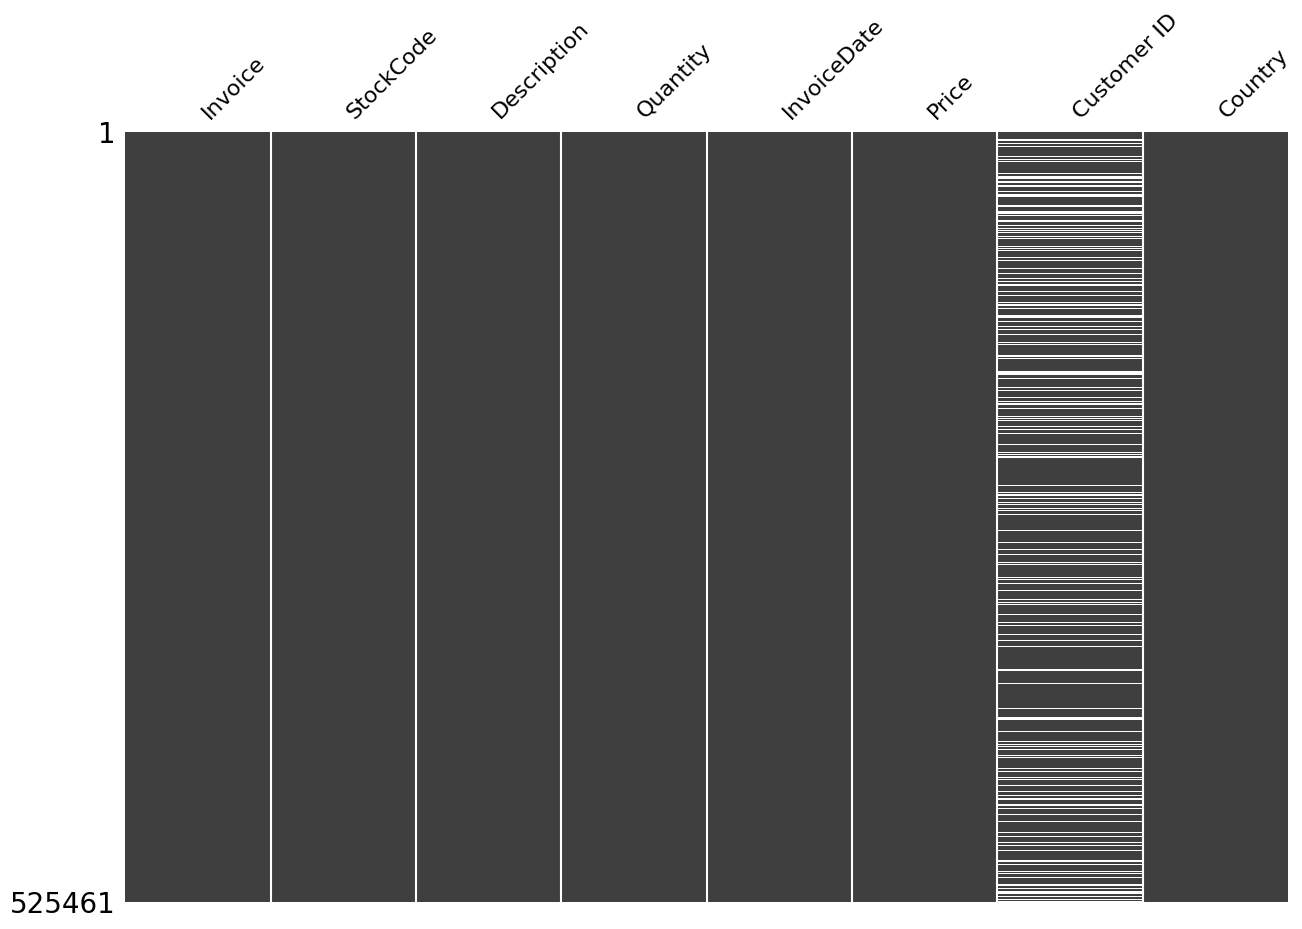

In [ ]:
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [ ]:
def limpieza(df_in):

  df = df_in.copy()
  for col in list(df.columns):
    if is_numeric_dtype(df[col]):
      df = df.drop(df[df[col] < 0].index)
      #df[col] = df[col].abs()

  df.dropna(axis=0,inplace=True)
  df.drop_duplicates(inplace=True)

  return df

In [ ]:
df_retail_cleaned = limpieza(df_retail)

In [ ]:
profile_serie(df_retail_cleaned['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         400947.0
Mean                          13.768523
Std                           97.639816
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        9417.083923
Skew                          79.272908
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400833
Duplicate rows (%)              99.97 %
Total size in memory      6415152 bytes
dtype: object

In [ ]:
profile_serie(df_retail_cleaned['Price'])

## Price Profile

Type                            float64
Number of observations         506291.0
Mean                            4.26152
Std                           63.994952
Min                                 0.0
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              0
Negative (%)                      0.0 %
Zeros                              1560
Zeros (%)                        0.31 %
Kurt                       60918.898185
Skew                         209.285747
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   505435
Duplicate rows (%)              99.83 %
Total size in memory      8100656 bytes
dtype: object

## Bivariant Analysis:

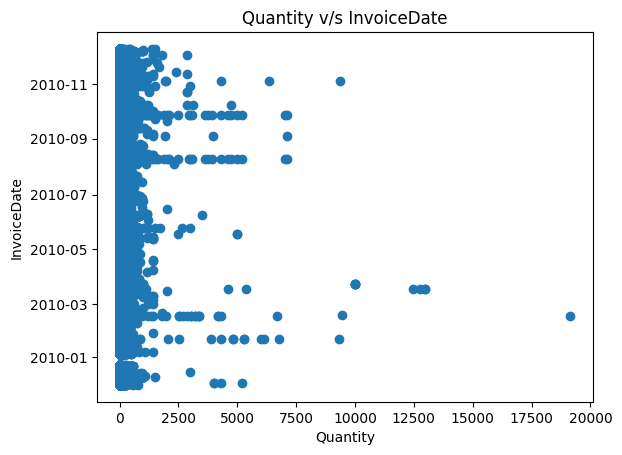

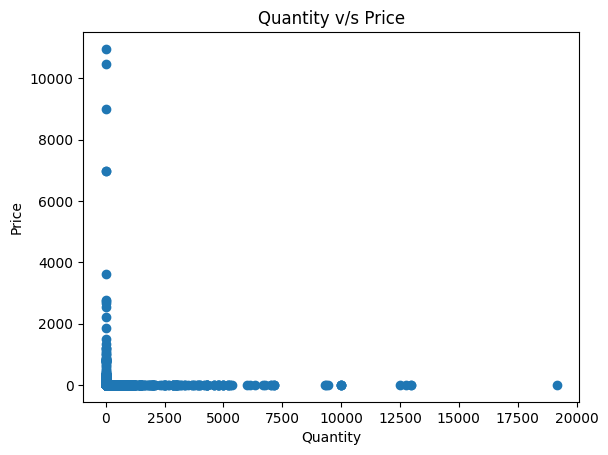

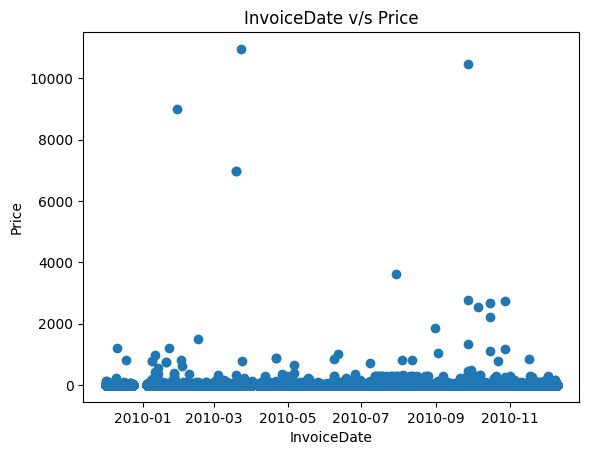

## Correlation:

<ipython-input-7-5c317ab18072>:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

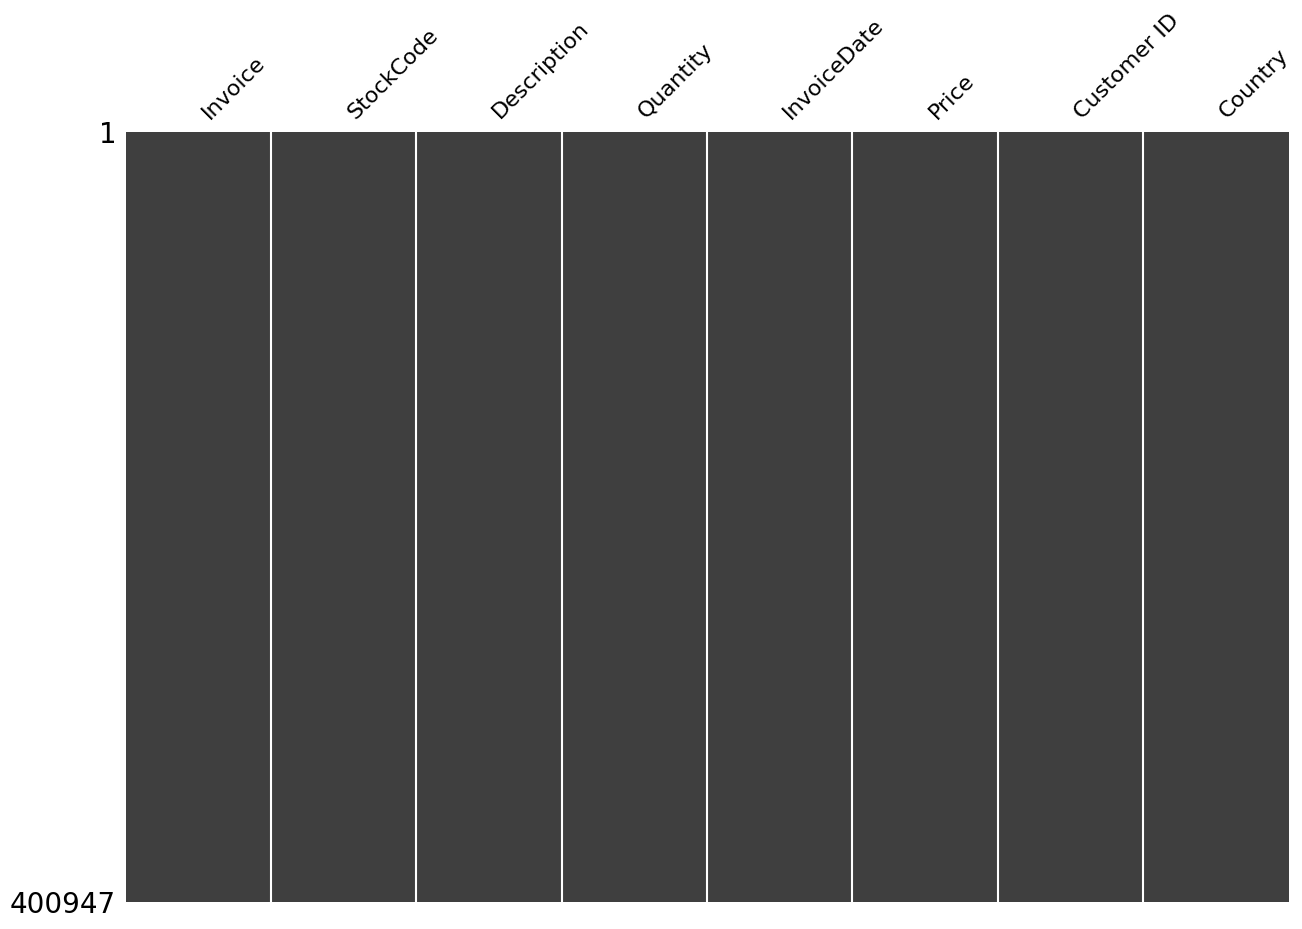

In [ ]:
profile_df(df_retail_cleaned)

**Respuesta:** Se redujo la cantidad de observaciones en mas de 12000 tras eliminar las filas con valores nulos, negativos y duplicados. Esto resulta en una nueva distribucion de los datos mas trabajable como se puede apreciar en los nuevos histogramas, y no afecto la correlacion.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [ ]:
df = df_retail_cleaned.copy()
df["Ingresos"]=df["Price"]*df["Quantity"]
df_groupby=df.groupby("Description").sum()

<ipython-input-32-0b8517327b7b>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
def TOPS (df_in):

  '''
  df = df.nlargest(30, 'Price')
  df = df.sort_values('Price')
  
  df["Ingresos/Cantidades"] = df["Price"]/df["Quantity"]
  '''
  df_groupby.sort_values("Ingresos",ascending=False,inplace=True)
  df_groupby.reset_index(inplace=True)
  display(df_groupby.head(30))

  fig = px.bar(df_groupby.head(30), x='Description', y='Ingresos')
  fig.show()
  fig = px.bar(df_groupby.head(30), x='Description', y='Quantity')
  fig.show()

In [ ]:
TOPS(df_retail_cleaned)

,level_0,index,Description,Quantity,Price,Ingresos
0,0,0,WHITE HANGING HEART T-LIGHT HOLDER,56814,8868.69,151339.16
1,61,1,REGENCY CAKESTAND 3 TIER,12489,21080.15,143727.60
2,538,2,Manual,2569,96580.69,98531.99
3,4,3,ASSORTED COLOUR BIRD ORNAMENT,44431,2265.15,70291.03
4,7,4,JUMBO BAG RED RETROSPOT,29519,2050.35,51644.25
5,628,5,POSTAGE,2212,19964.83,48741.08
6,18,6,ROTATING SILVER ANGELS T-LIGHT HLDR,21579,638.86,40156.05
7,48,7,PAPER CHAIN KIT 50'S CHRISTMAS,13839,2372.30,36871.55
8,111,8,PARTY BUNTING,8312,3294.50,35017.30
9,147,9,EDWARDIAN PARASOL NATURAL,7201,2847.40,34044.75


In [ ]:
df = df_retail_cleaned.copy()
df["Ingresos"]=df["Price"]*df["Quantity"]
df_groupby=df.groupby("Description").sum()
df_groupby.sort_values("Quantity",ascending=False,inplace=True)
df_groupby.reset_index(inplace=True)
fig = px.bar(df_groupby.head(30), x='Description', y='Quantity')
fig.show()

<ipython-input-40-b28c35fcfaa8>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



**Respuesta:** No de manera consistente. Si bien el articulo mas vendido es a la vez el que genera mayor ganancia, el segundo y tercero en cuanto a ingresos tienen una cantidad muy baja de ventas comparativamente. Esto pues es claro que el ingreso que genere un producto esta tambien relacionado con el precio, y no solo con la cantidad de ventas. 

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [ ]:
def plot_ventas(dataframe,date_col="InvoiceDate"):
    df=dataframe.copy()
    df[date_col]=pd.to_datetime(df[date_col]).dt.date
    df["Ingresos"]=df["Price"]*df["Quantity"]

    df_groupby=df.groupby(date_col).sum("Ingresos").reset_index()
    fig = px.line(df_groupby, x=date_col, y='Ingresos')
    fig.show()
    
    
plot_ventas(df_retail_cleaned) 

**Respuesta:** En general hay peaks que parecieran no tener explicacion, como el 7 de enero, o el 27 de septiembre. Los peaks en general suceden cada 5 o 10 dias, podria haber una correlacion entre el dia de la semana y estos ciclos, pero no es posible concluir eso de los datos.
Por otro lado, visualmente se puede ver que las ventas suben el nivel base a partir de fines de septiembre. Dada la naturaleza de los productos es posible afirmar que esta subida tenga que ver con las festividades de esos meses, como Hannuka, Halloween, Navidad, etc.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>